### Exercise: Outlier removal using standard deviation and z score
You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [11]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
df = pd.read_csv("data/bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [5]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

Above, you can see max is 12 000 000, which is too much price for price per sqft. Looks like this dataset has some very bad outliers so we will first remove those with percentile and then use z score

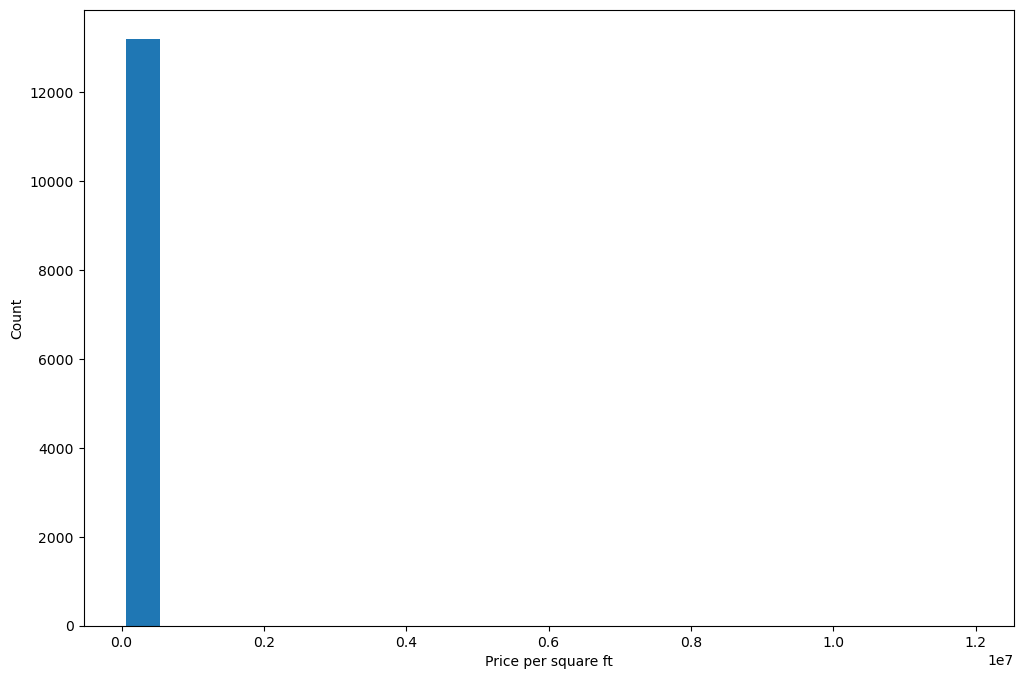

In [15]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

Above chart confirms our understanding that this dataset has some bad outliers. Because we see only one bar with more than 12000 data points but on the right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000 hence we can hardly see any bar

Using log scale can make visualization little better

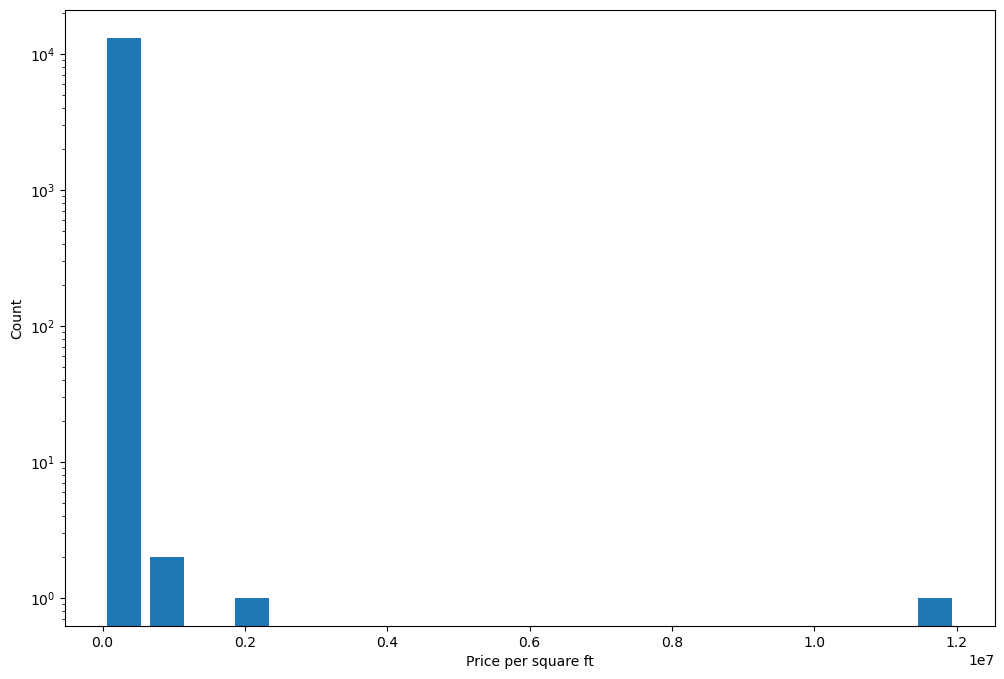

In [16]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

# 1 Treat outliers using percentile first

In [10]:
min_threshold, max_treshold =  df.price_per_sqft.quantile([0.001, 0.999])
min_threshold, max_treshold 

(1366.184, 50959.36200000098)

In [17]:
outliers = df[(df.price_per_sqft>max_treshold) | (df.price_per_sqft<min_threshold)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7012,other,1 BHK,650.0,1.0,500.0,1,76923
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
8307,Bannerghatta Road,5 BHK,2500.0,4.0,1400.0,5,56000
11635,Begur,3 BHK,2400.0,3.0,12.0,3,500
1005,other,1 BHK,15.0,1.0,30.0,1,200000
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
9144,other,4 Bedroom,10961.0,4.0,80.0,4,729
7575,other,1 BHK,425.0,1.0,750.0,1,176470
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
5343,other,9 BHK,42000.0,8.0,175.0,9,416


Above shows properties that has price_per_sqft value such as 500 rs which is very very low for the city of banglore. You would be very lucky if you can find such as property. Also we have properties that has price per sqft value such as 12000000 which is way too high. It seems almost impossible and even if it is legitimate it can help data analysis process if we remove such a data point



In [20]:
df2 = df[(df.price_per_sqft > min_threshold) & (df.price_per_sqft < max_treshold)]
df2.shape

(13172, 7)

In [21]:
df.shape

(13200, 7)

In [23]:
df.shape[0] - df2.shape[0]

28

We removed total 28 outliers

# Remove outliers using 4 standard deviation

In [25]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit, min_limit

(23227.73653589429, -9900.429065502552)

In [26]:
df2[(df2.price_per_sqft > max_limit) | (df2.price_per_sqft < min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5639,other,3 BHK,2777.29,5.0,650.0,3,23404
45,HSR Layout,8 Bedroom,600.00,9.0,200.0,8,33333
8595,other,3 Bedroom,1200.00,2.0,300.0,3,25000
9808,Uttarahalli,6 Bedroom,1200.00,6.0,330.0,6,27500
9290,other,4 Bedroom,2400.00,3.0,750.0,4,31250
6285,Malleshwaram,4 Bedroom,3000.00,5.0,815.0,4,27166
12609,other,6 Bedroom,2295.00,3.0,650.0,6,28322
12393,Electronic City Phase II,1 BHK,1200.00,1.0,295.0,1,24583
1281,Chamrajpet,9 Bedroom,4050.00,7.0,1200.0,9,29629
3136,other,4 Bedroom,1200.00,4.0,350.0,4,29166


In [28]:
df3 = df2[(df2.price_per_sqft < max_limit) & (df2.price_per_sqft > min_limit)]
df3.shape

(13047, 7)

In [34]:
df2.shape[0] - df3.shape[0]

125

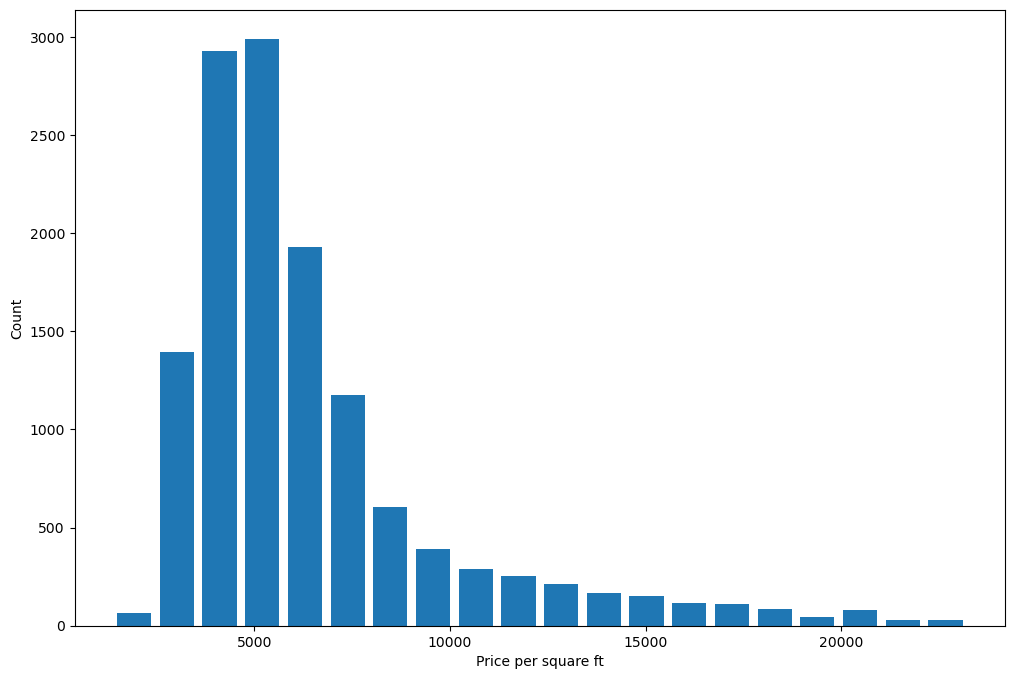

In [35]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

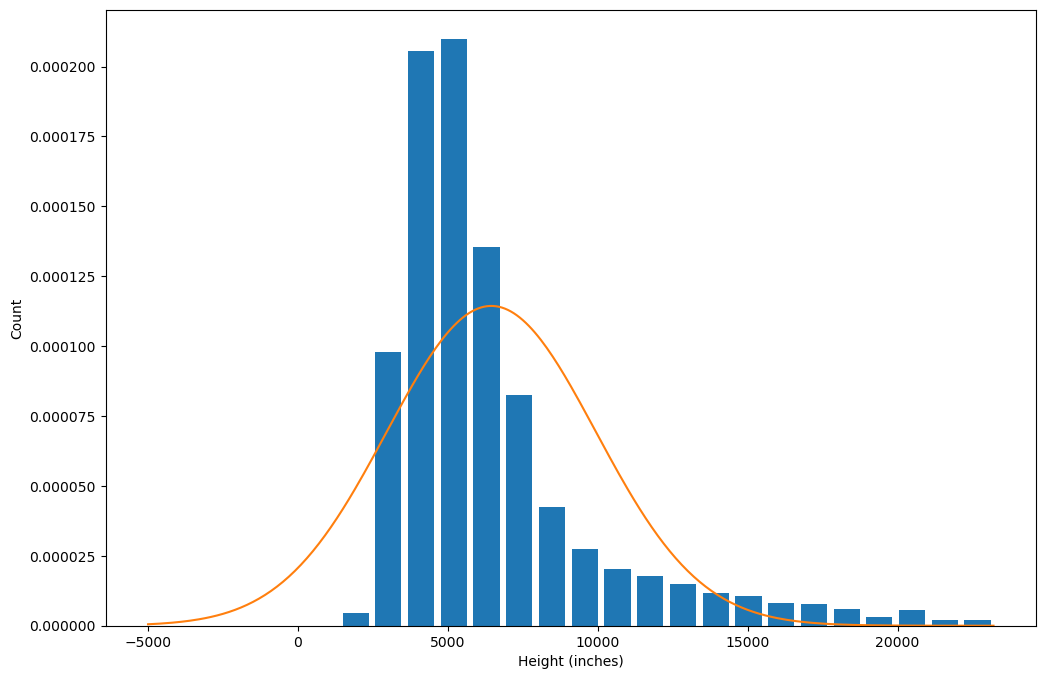

In [39]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))
plt.show()

# Remove outliers using z score. Use z score of 4 as your thresold

In [45]:
df2['zscore'] = (df2.price_per_sqft - df2.price_per_sqft.mean()) / df2.price_per_sqft.std()

df2.sample(10)

/var/folders/r2/9ll477s10d7gz6rx5kpl7c500000gn/T/ipykernel_55619/1961501857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft - df2.price_per_sqft.mean()) / df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
11375,Jigani,2 BHK,918.0,2.0,56.00,2,6100,-0.136115
6564,Hoskote,5 Bedroom,900.0,5.0,110.00,5,12222,1.342265
11912,other,2 BHK,1050.0,2.0,45.00,2,4285,-0.574412
2692,8th Phase JP Nagar,3 BHK,1455.0,3.0,73.31,3,5038,-0.392573
8255,Bhoganhalli,4 BHK,2439.0,4.0,185.00,4,7585,0.222493
12688,Hennur,3 BHK,1830.0,3.0,121.00,3,6612,-0.012474
9137,Old Madras Road,4 BHK,3630.0,6.0,207.00,4,5702,-0.232226
2146,Raja Rajeshwari Nagar,3 BHK,1530.0,3.0,61.20,3,4000,-0.643236
1094,Hoodi,3 BHK,1639.0,3.0,110.00,3,6711,0.011433
3023,Ramagondanahalli,2 BHK,1251.0,2.0,47.40,2,3788,-0.694431


In [46]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore > 4)]
outliers_z.shape

(125, 8)

In [47]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
3420,other,3 Bedroom,1350.0,3.0,380.0,3,28148,5.188176
8483,HSR Layout,8 Bedroom,800.0,8.0,285.0,8,35625,6.993770
849,other,4 Bedroom,2400.0,4.0,640.0,4,26666,4.830294
4357,other,4 Bedroom,3250.0,5.0,850.0,4,26153,4.706411


In [48]:
df4 = df2[(df2.zscore > -4) & (df2.zscore < 4)]
df4.shape

(13047, 8)

In [49]:
df2.shape[0] - df4.shape[0]

125